In [8]:
import matplotlib.pyplot as plt
from case_studies.dc2_mdt.utils.simulate_image import ImageSimulator

In [9]:
image_size = 4
max_objects = 2

In [10]:
image_simulator = ImageSimulator(img_height=4,
                                 img_width=4,
                                 max_objects=max_objects,
                                 min_flux=200.0,
                                 psf_stdev=1.0,
                                 background_intensity=100.0)

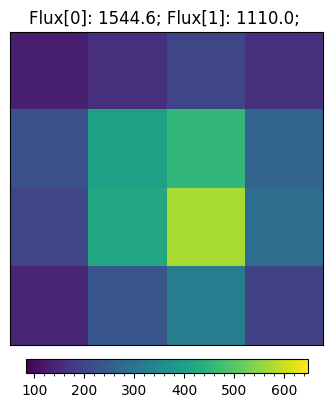

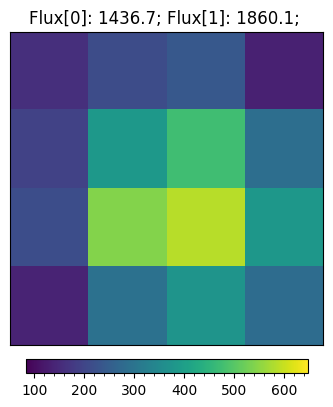

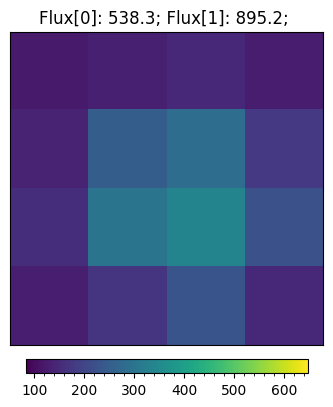

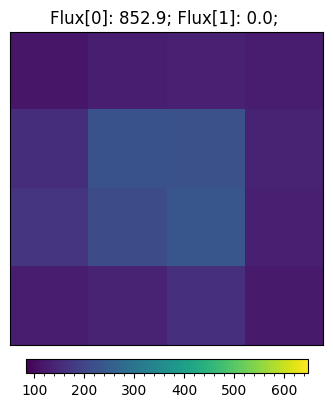

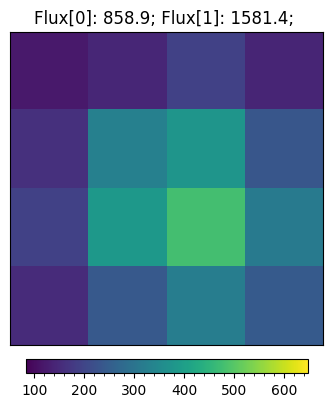

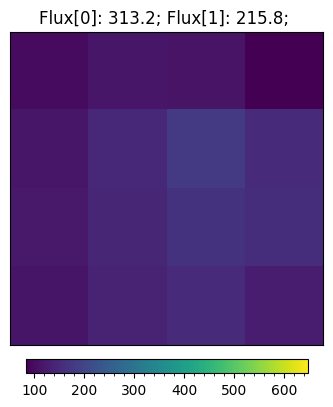

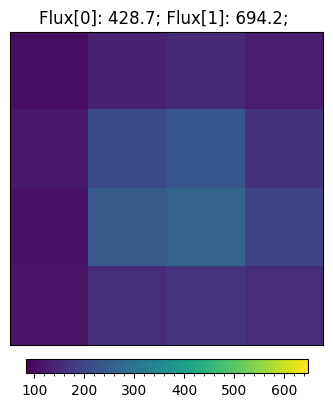

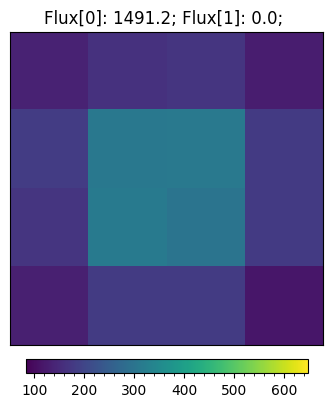

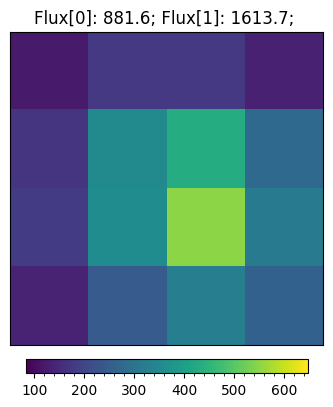

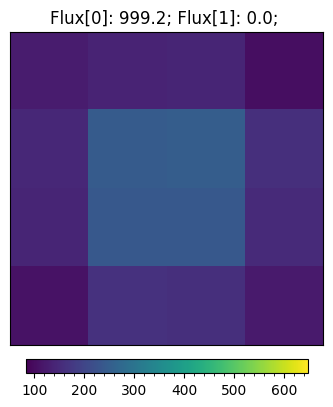

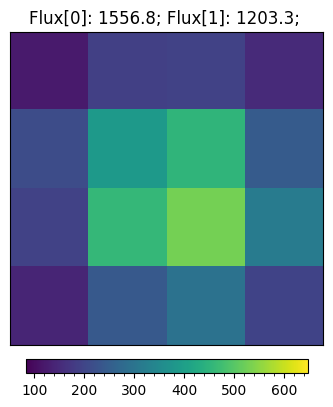

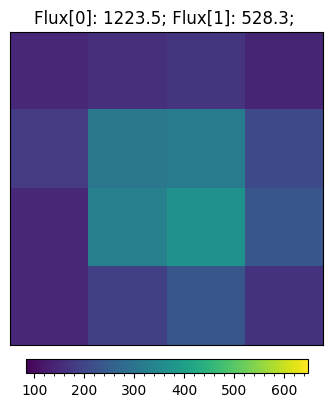

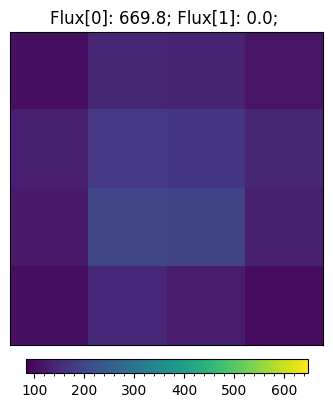

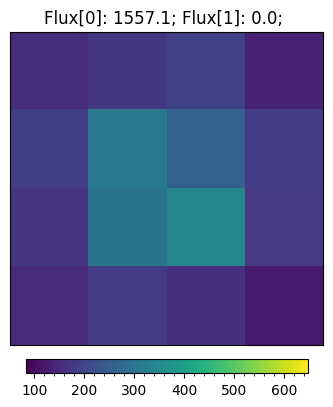

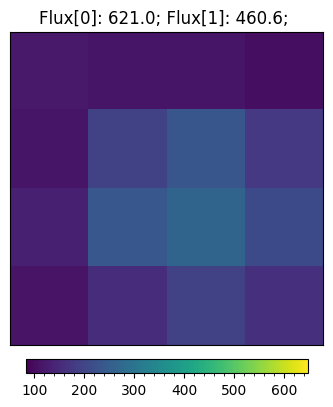

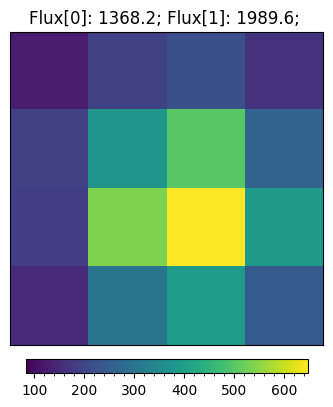

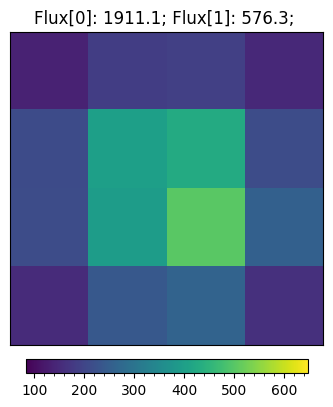

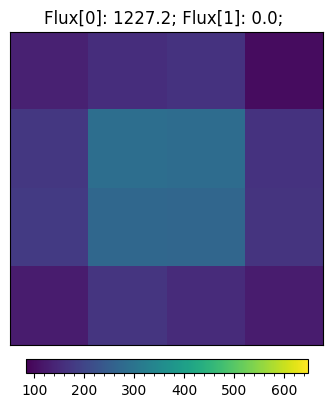

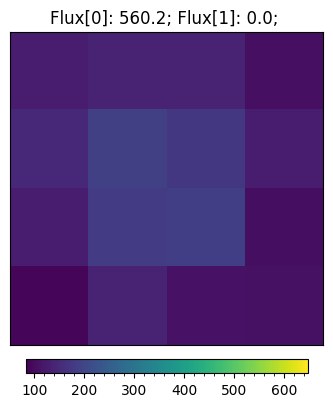

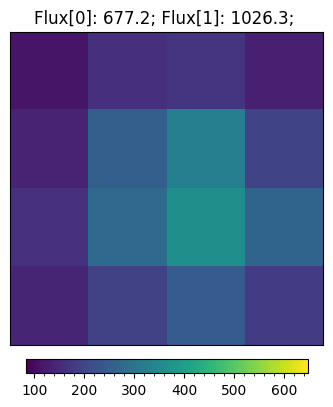

In [11]:
outputs = image_simulator.generate(batch_size=20, seed=7272)
images = outputs["images"]
fluxes = outputs["fluxes"]
img_max = images.max()
img_min = images.min()
for sub_img, flux in zip(images, fluxes):
    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    im = ax.imshow(sub_img.cpu(), vmin=img_min, vmax=img_max)
    ax.set_xticks([])
    ax.set_yticks([])
    if flux.shape[0] == 1:
        ax.set_title(f"Flux: {flux.item():.1f}")
    else:
        t = ""
        for i, f in enumerate(flux):
            t += f"Flux[{i}]: {f.item():.1f}; "
        ax.set_title(t)
    cb = fig.colorbar(im, ax=ax, 
                      location="bottom", shrink=0.6,
                      anchor=(0.5, 2.0))
    cb.minorticks_on()
    fig.tight_layout()
    fig.show()

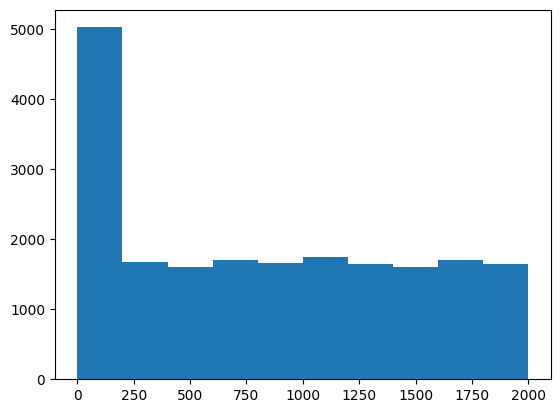

In [12]:
outputs = image_simulator.generate(batch_size=10_000)
fluxes = outputs["fluxes"]
plt.hist(fluxes.flatten().cpu())
plt.show()

In [13]:
fluxes.max()

tensor(1999.9844)

In [14]:
fluxes.min()

tensor(0.)